In [1]:
from pathlib import Path
home = str(Path.home())
import sys
sys.path.append('{}/prog/msm/lib'.format(home))

In [2]:
import numpy as np
from simlib import *
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.set_cmap('rainbow')

<Figure size 432x288 with 0 Axes>

In [22]:
N = 2
m = 3.5
gaussians = []
gaussians.append(gaussian(A=np.ones(1)*10,
                          M=np.array([-m]),
                          S=np.array([1])))
gaussians.append(gaussian(A=np.ones(1),
                          M=np.array([m]),
                          S=np.ones(1)))
U = potential(gaussians)

-3.7271047274306035 -5.431852819462952 False


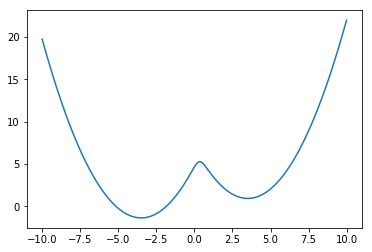

In [94]:
bins = np.arange(-10,10,0.01)
A = U.get_value([m]) - U.get_value([0])
B = -np.log(1+np.exp(-2*m**2)) - m**2/2+np.log(2)
print(A, B, A==B)
y = [U.get_value([x]) for x in bins]
plt.plot(bins, y)

In [98]:
num_steps = 10000
num_particles = 1000
parameters = {
    'name': 'equilibrium_test',
    'num_dim': 1,
    'num_steps': num_steps,
    'num_particles': num_particles,
    'KBT': 1,
    'Ddt': 0.001,
    'x0': np.zeros(num_particles),
    'potential': U
}

In [99]:
Xs = simulate(parameters)

In [100]:
Xs_all = np.array([0])
for i in range(num_particles):
    Xs_all = np.concatenate((Xs_all, Xs[:,0,i]), axis=0)

<BarContainer object of 1999 artists>

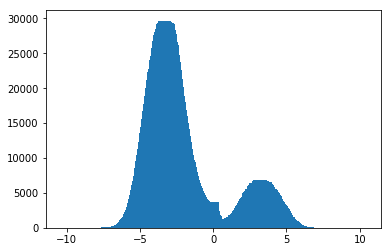

In [101]:
hist, _ = np.histogram(Xs_all, bins)
plt.bar(bins[:-1], hist)

In [103]:
bft = np.exp(U.get_value([-m]) - U.get_value([m]))
bfs = hist[1351] / hist[650]
print(bft, bfs)

0.10000000002266837 0.22394640005554398
